## Random Walk Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Configuration ---
start_value = 10    # Initial position
p = 0.5             # Probability
n_steps = 4         # Number of steps
n_walks = 1000      # Number of trajectories

# --- 2. Create starting position vector ---
start_pos = np.full((n_walks, 1), start_value)

# --- 3. Generate random steps (+1 or -1) ---
steps = np.random.choice([1, -1], size=(n_walks, n_steps), p=[p, 1-p])

# --- 4. Stack start position with steps and calculate cumulative sum ---
paths = np.hstack([start_pos, steps])
positions = np.cumsum(paths, axis=1)
final_positions = positions[:, -1]

In [2]:
print('steps = ')
print(steps)

steps = 
[[ 1  1  1  1]
 [ 1 -1  1  1]
 [-1 -1  1  1]
 ...
 [-1 -1  1 -1]
 [ 1  1 -1 -1]
 [-1  1  1 -1]]


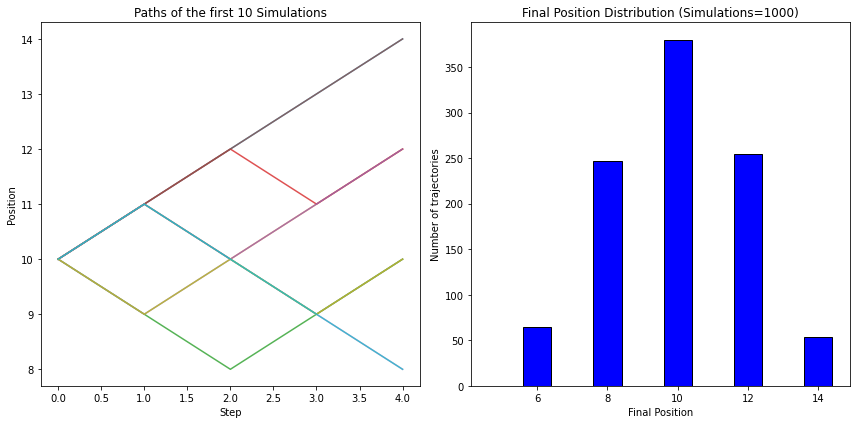

In [3]:
# --- 5. Visualization ---
plt.figure(figsize=(12, 6))

# Subplot 1: Path trajectories
plt.subplot(1, 2, 1)
plt.plot(positions[:10].T, alpha=0.8) # Plot the first 10 walks to show movement patterns 
plt.title(f"Paths of the first 10 Simulations")
plt.xlabel("Step")
plt.ylabel("Position")

# Subplot 2: Final distribution (Histogram)
plt.subplot(1, 2, 2)
bins = np.arange(start_value - n_steps - 1, start_value + n_steps + 2) - 0.5 # centered on integers
plt.hist(final_positions, bins=bins, rwidth=0.8, color='blue', edgecolor='black')
plt.title(f"Final Position Distribution (Simulations={n_walks})")
plt.xlabel("Final Position")
plt.ylabel('Number of trajectories')

plt.tight_layout() #ensure labels don't overlap
plt.show()

In [4]:
# --- 6. Calculate probabilities ---
unique_values, counts = np.unique(final_positions, return_counts=True) # find unique value and count their occurrences
probabilities = counts / n_walks

print("--- Empirical Probability: ---")
for val, prob in zip(unique_values, probabilities):
    current_count = counts[np.where(unique_values == val)[0][0]]
    print(f"Position {int(val):>2}: {prob:>6.2%} (Count: {int(current_count)})")

--- Empirical Probability: ---
Position  6:  6.50% (Count: 65)
Position  8: 24.70% (Count: 247)
Position 10: 38.00% (Count: 380)
Position 12: 25.40% (Count: 254)
Position 14:  5.40% (Count: 54)
